In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/custom-data/Custom_CNN_Features.csv


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/custom-data/Custom_CNN_Features.csv");
df.head()

,Filename,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB


In [4]:
df.describe()

,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
count,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.0,3253.000000,...,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,0.849062,17.516938,57.919104,112.822180,170.829473,17.606476,141.614480,11.035532,0.0,214.312125,...,171.788722,0.000105,156.541866,140.697822,175.032922,137.520308,111.645797,0.830283,71.926779,75.925521
std,0.689245,54.948034,93.672074,96.561850,124.512873,35.626627,99.128478,20.554964,0.0,738.811309,...,549.640363,0.005983,420.492050,471.266997,415.644562,149.519860,105.996694,3.439972,112.191866,135.273056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,46.988506,85.638191,0.000000,76.372185,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.641617,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,93.278381,160.636246,0.000000,132.048889,0.000000,0.0,0.000000,...,0.000000,0.000000,35.827831,0.000000,59.605762,87.407989,79.497665,0.000000,0.000000,0.000000
75%,1.000000,0.000000,117.704697,159.855179,248.145508,12.160916,207.697266,16.175734,0.0,0.000000,...,52.716290,0.000000,98.118843,13.611436,139.699936,225.686981,175.588440,0.000000,164.374664,107.249413
max,2.000000,781.789490,459.207794,536.879639,760.753845,202.598496,587.289551,217.982010,0.0,10129.193360,...,7535.423828,0.341233,5972.883789,6563.629883,5749.376465,750.316284,571.680176,31.048813,505.643402,1758.735840


In [5]:
# Check the data types of the columns
print(df.dtypes)

Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object


In [6]:
print(df.isnull().sum())

Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64


In [7]:
# Check for missing values in each column and print if there are any
missing_values = df.isnull().sum()

if missing_values.any():
    print(missing_values)
else:
    print("No missing values in the dataset.")


No missing values in the dataset.


In [8]:
# Assuming 'target_column' is the name of your target column
class_distribution = df['Class Label'].value_counts()

print(class_distribution)


Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


In [9]:
# Show proportions instead of counts
class_proportions = df['Class Label'].value_counts(normalize=True)

print(class_proportions)


Class Label
1    0.502306
0    0.324316
2    0.173378
Name: proportion, dtype: float64


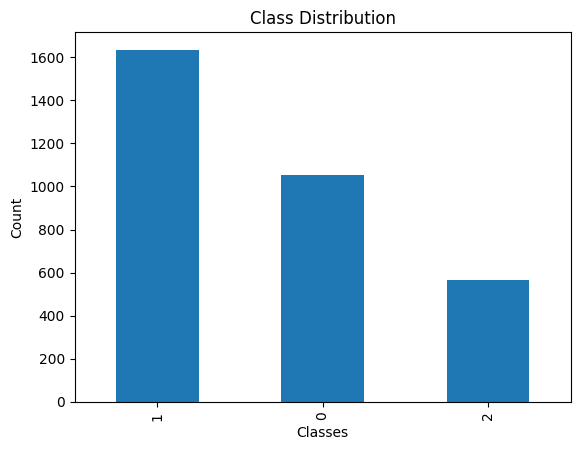

In [10]:
import matplotlib.pyplot as plt

# Plot class distribution
df['Class Label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


In [11]:
#UnderSample
!pip install imbalanced-learn



In [12]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Filename'], dtype='object')


In [13]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=['Class Label','Filename'])
y = df['Class Label']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts(normalize=True))

# print(df['Class Label'].dtypes)

Class Label
2    0.333333
0    0.333333
1    0.333333
Name: proportion, dtype: float64


In [14]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts(normalize=True))


Class Label
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


In [15]:
# Select 5 specific columns (replace with the actual column names)
df_selected_columns = df[['f6', 'f8', 'f10', 'f11', 'Class Label']]

# Slice the first 100 rows
df_selected = df_selected_columns[:100]

# Display the first few rows of the selected DataFrame
print(df_selected)



           f6           f8         f10         f11  Class Label
0    0.000000   414.879486   87.242172    0.000000            2
1   48.989120  1736.242432  438.739990  149.485138            2
2    0.000000   435.235992   94.642509    3.476373            2
3    0.000000   588.439148  138.316498    0.832891            2
4   37.368713  1080.826782  276.387207  124.925179            2
..        ...          ...         ...         ...          ...
95   9.468937   434.675873  103.926575   25.727747            2
96   4.671134   700.835510  172.222687   50.114975            2
97   0.000000   326.379089   62.779148    0.000000            2
98  20.545481   893.533386  227.656921   82.206955            2
99  25.922182   875.304810  219.056534   81.395096            2

[100 rows x 5 columns]


In [16]:
# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print(correlation_matrix)


                   f6        f8       f10       f11  Class Label
f6           1.000000  0.893565  0.901422  0.956280          NaN
f8           0.893565  1.000000  0.999107  0.853152          NaN
f10          0.901422  0.999107  1.000000  0.866998          NaN
f11          0.956280  0.853152  0.866998  1.000000          NaN
Class Label       NaN       NaN       NaN       NaN          NaN


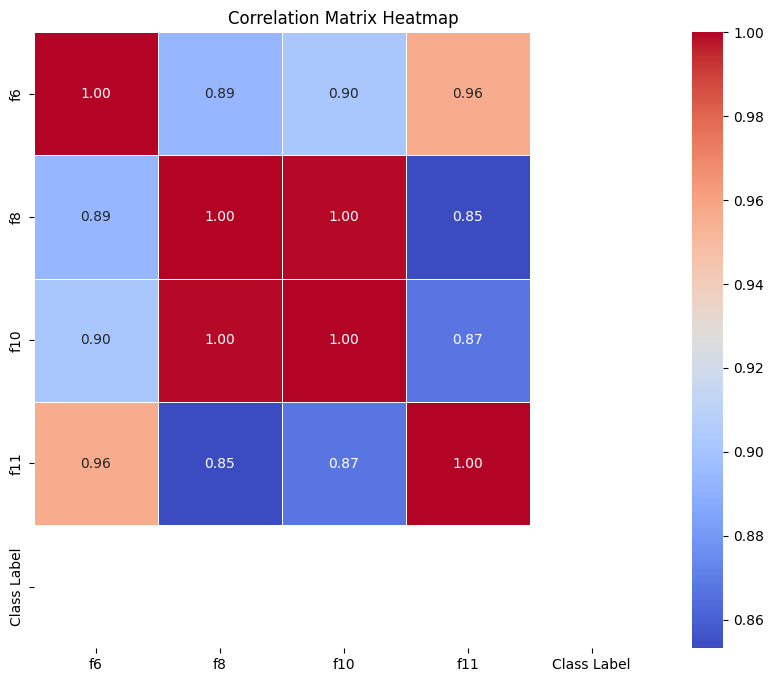

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [18]:
import numpy as np

# Assuming `df` is the DataFrame with numerical columns
# Ensure you are working only with numerical data
df = df.drop(columns=['Filename'])
data_matrix = df.values

# Calculate the rank of the matrix
matrix_rank = np.linalg.matrix_rank(data_matrix)

# Display the rank of the matrix
print(f"The rank of the data matrix is: {matrix_rank}")


The rank of the data matrix is: 175


In [19]:
print(df.values)

[[   2.           50.55746841    0.         ...    0.
     0.           91.43869781]
 [   2.          125.2560272     0.         ...    0.
     0.          297.4831238 ]
 [   2.           50.16060638    0.         ...    0.
     0.           93.7956543 ]
 ...
 [   2.          781.7894897     0.         ...    0.
     0.         1758.73584   ]
 [   2.          688.9666748     0.         ...    0.
     0.         1670.340088  ]
 [   2.          180.3104553     0.         ...    0.
     0.          408.5253296 ]]


In [20]:
# Check the data range (min and max) for each column
data_range = df.describe().loc[['min', 'max']]
print("Data Range (Min and Max) for each feature:")
print(data_range)


Data Range (Min and Max) for each feature:
     Class Label         f0          f1          f2          f3          f4  \
min          0.0    0.00000    0.000000    0.000000    0.000000    0.000000   
max          2.0  781.78949  459.207794  536.879639  760.753845  202.598496   

             f5         f6   f7           f8  ...         f190      f191  \
min    0.000000    0.00000  0.0      0.00000  ...     0.000000  0.000000   
max  587.289551  217.98201  0.0  10129.19336  ...  7535.423828  0.341233   

            f192         f193         f194        f195        f196       f197  \
min     0.000000     0.000000     0.000000    0.000000    0.000000   0.000000   
max  5972.883789  6563.629883  5749.376465  750.316284  571.680176  31.048813   

           f198        f199  
min    0.000000     0.00000  
max  505.643402  1758.73584  

[2 rows x 201 columns]


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Convert back to a DataFrame for readability
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print("Normalized Data (Min-Max):")
print(normalized_df.head())


Normalized Data (Min-Max):
   Class Label        f0   f1   f2   f3   f4   f5        f6   f7        f8  \
0          1.0  0.064669  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.040959   
1          1.0  0.160217  0.0  0.0  0.0  0.0  0.0  0.224739  0.0  0.171410   
2          1.0  0.064161  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.042968   
3          1.0  0.081506  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.058093   
4          1.0  0.082483  0.0  0.0  0.0  0.0  0.0  0.171430  0.0  0.106704   

   ...      f190  f191      f192      f193      f194  f195  f196  f197  f198  \
0  ...  0.041971   0.0  0.040111  0.042329  0.035791   0.0   0.0   0.0   0.0   
1  ...  0.174819   0.0  0.167436  0.170408  0.179214   0.0   0.0   0.0   0.0   
2  ...  0.043856   0.0  0.042172  0.043888  0.038420   0.0   0.0   0.0   0.0   
3  ...  0.058768   0.0  0.057785  0.059281  0.052951   0.0   0.0   0.0   0.0   
4  ...  0.110830   0.0  0.108765  0.105597  0.120124   0.0   0.0   0.0   0.0   

       f199  
0  0.0519

In [22]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Replace 'target_column' with the name of your target column
X = df.drop(columns=['Class Label'])  # Features
y = df['Class Label']  # Target

# Perform the split (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (2439, 200)
X_test shape: (814, 200)
y_train shape: (2439,)
y_test shape: (814,)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


# # Initialize classifiers
# classifiers = {
#     "Naive Bayes": GaussianNB(),
#     "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
#     "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
# }



In [24]:
from sklearn.svm import SVC

# Add SVM to the classifiers
classifiers = {
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naïve Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True)  # Enable probability estimates
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else None
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None else "N/A"
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "AUROC": auc
    }
    
    # Print the classification report
    print(f"\nClassifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    if y_proba is not None:
        print(f"AUROC: {auc:.4f}")



Classifier: k-Nearest Neighbors
Accuracy: 0.9287
Precision: 0.9303
Recall: 0.9287
F1-Score: 0.9288
AUROC: 0.9673

Classifier: Decision Tree
Accuracy: 0.9140
Precision: 0.9144
Recall: 0.9140
F1-Score: 0.9141
AUROC: 0.9334

Classifier: Random Forest
Accuracy: 0.9349
Precision: 0.9369
Recall: 0.9349
F1-Score: 0.9349
AUROC: 0.9831

Classifier: Naïve Bayes
Accuracy: 0.9275
Precision: 0.9290
Recall: 0.9275
F1-Score: 0.9276
AUROC: 0.9650

Classifier: Support Vector Machine
Accuracy: 0.9238
Precision: 0.9277
Recall: 0.9238
F1-Score: 0.9240
AUROC: 0.9801


In [26]:
from sklearn.metrics import accuracy_score, f1_score

# Store results for underfitting, overfitting, and regular fit analysis
fit_analysis = {}

for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predictions on training and test sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Compute metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    
    # Compute metrics for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    
    # Analyze fit type
    if train_accuracy < 0.7 and test_accuracy < 0.7:
        fit_type = "Underfitting"
    elif train_accuracy - test_accuracy > 0.1:
        fit_type = "Overfitting"
    else:
        fit_type = "Regular Fit"
    
    # Store results
    fit_analysis[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train F1-Score": train_f1,
        "Test F1-Score": test_f1,
        "Fit Type": fit_type
    }

# Display fit analysis results
for name, metrics in fit_analysis.items():
    print(f"\nClassifier: {name}")
    print(f"Train Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"Train F1-Score: {metrics['Train F1-Score']:.4f}")
    print(f"Test F1-Score: {metrics['Test F1-Score']:.4f}")
    print(f"Fit Type: {metrics['Fit Type']}")



Classifier: k-Nearest Neighbors
Train Accuracy: 0.9405
Test Accuracy: 0.9287
Train F1-Score: 0.9405
Test F1-Score: 0.9288
Fit Type: Regular Fit

Classifier: Decision Tree
Train Accuracy: 1.0000
Test Accuracy: 0.9140
Train F1-Score: 1.0000
Test F1-Score: 0.9142
Fit Type: Regular Fit

Classifier: Random Forest
Train Accuracy: 1.0000
Test Accuracy: 0.9337
Train F1-Score: 1.0000
Test F1-Score: 0.9337
Fit Type: Regular Fit

Classifier: Naïve Bayes
Train Accuracy: 0.9217
Test Accuracy: 0.9275
Train F1-Score: 0.9217
Test F1-Score: 0.9276
Fit Type: Regular Fit

Classifier: Support Vector Machine
Train Accuracy: 0.9295
Test Accuracy: 0.9238
Train F1-Score: 0.9293
Test F1-Score: 0.9240
Fit Type: Regular Fit


In [27]:
import time
from sklearn.metrics import accuracy_score, f1_score

# Store results for timing analysis
timing_results = {}

for name, clf in classifiers.items():
    # Timing for training
    start_train = time.time()
    clf.fit(X_train, y_train)
    end_train = time.time()
    train_time = end_train - start_train  # Training time in seconds
    
    # Timing for classification (prediction)
    start_test = time.time()
    y_test_pred = clf.predict(X_test)
    end_test = time.time()
    test_time = end_test - start_test  # Testing time in seconds
    
    # Compute metrics for evaluation
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    
    # Store results
    timing_results[name] = {
        "Train Time (s)": train_time,
        "Test Time (s)": test_time,
        "Test Accuracy": test_accuracy,
        "Test F1-Score": test_f1
    }

# Display timing results
print("\nTiming Results:")
for name, metrics in timing_results.items():
    print(f"\nClassifier: {name}")
    print(f"Train Time: {metrics['Train Time (s)']:.4f} seconds")
    print(f"Test Time: {metrics['Test Time (s)']:.4f} seconds")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"Test F1-Score: {metrics['Test F1-Score']:.4f}")



Timing Results:

Classifier: k-Nearest Neighbors
Train Time: 0.0090 seconds
Test Time: 0.0655 seconds
Test Accuracy: 0.9287
Test F1-Score: 0.9288

Classifier: Decision Tree
Train Time: 0.1910 seconds
Test Time: 0.0043 seconds
Test Accuracy: 0.9177
Test F1-Score: 0.9178

Classifier: Random Forest
Train Time: 1.0202 seconds
Test Time: 0.0193 seconds
Test Accuracy: 0.9386
Test F1-Score: 0.9386

Classifier: Naïve Bayes
Train Time: 0.0105 seconds
Test Time: 0.0062 seconds
Test Accuracy: 0.9275
Test F1-Score: 0.9276

Classifier: Support Vector Machine
Train Time: 0.9349 seconds
Test Time: 0.1047 seconds
Test Accuracy: 0.9238
Test F1-Score: 0.9240
